<a href="https://colab.research.google.com/github/stepka123/basic-NL-SA/blob/main/main_NL_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
import numpy as np

Перцептрон с двумя входами, обучающийся на основе OR-функции(мат-логика если есть 1 то будет 1 на выходе, если нет ни одной 1, то будет всегда 0). Веса и смещение с первого раза рандомно, потом обновляются в процессе обучения с помощью правила коррекции ошибки.

In [ ]:
import numpy as np

class perceptron():
  def __init__(self, input_size, learning_rate = 0.1):
    self.weights = np.random.randn(input_size)
    self.bias = np.random.randn()
    self.learning_rate = learning_rate

  def activate(self, x):
    return 1 if x >= 0 else 0

  def predict(self, inputs):
    weihted_sum = np.dot(inputs, self.weights) + self.bias
    return self.activate(weihted_sum)

  def train(self, inputs, target):
    prediction = self.predict(inputs)
    err = target - prediction
    self.weights += self.learning_rate * err * inputs
    self.bias += self.learning_rate * err


if __name__ == "__main__":
    # Создаем перцептрон с двумя входами
    Perceptron = perceptron(2)

    # Обучающие данные
    training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = np.array([])  # OR-функция

    # Обучение перцептрона
    for epoch in range(100):
        for inputs, label in zip(training_inputs, labels):
            Perceptron.train(inputs, label)

    # Проверяем работу перцептрона
    test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    for inputs in test_inputs:
        print(f"Input: {inputs}, Predicted Output: {Perceptron.predict(inputs)}")

Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


Теперь задача на основе выше примера с тремя нейронами на входе:


In [ ]:
import numpy as np

class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.random.randn(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.random.randn(output_size)
        self.learning_rate = learning_rate

    def activate(self, x):
        return 1 / (1 + np.exp(-x))  # Сигмоидальная функция активации

    def activate_derivative(self, x):
        return x * (1 - x)  # Производная сигмоидальной функции активации

    def forward(self, inputs):
        # Прямое распространение входных данных через сеть
        self.hidden_sum = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.activate(self.hidden_sum)
        self.output_sum = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.activate(self.output_sum)
        return self.output

    def backward(self, inputs, target):
        # Обратное распространение ошибки и коррекция весов
        output_error = target - self.output
        output_delta = output_error * self.activate_derivative(self.output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.activate_derivative(self.hidden_output)

        self.weights_hidden_output += self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output += self.learning_rate * np.sum(output_delta)
        self.weights_input_hidden += self.learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden += self.learning_rate * np.sum(hidden_delta)

# Пример использования
if __name__ == "__main__":
    # Создаем многослойный перцептрон
    mlp = MultilayerPerceptron(input_size=3, hidden_size=3, output_size=1)

    # Обучающие данные
    training_inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
    labels = np.array([[0], [1], [1], [0]])  # Пример XOR-функции

    # Обучение многослойного перцептрона
    for epoch in range(10000):
        for inputs, label in zip(training_inputs, labels):
            mlp.forward(inputs.reshape(1, -1))
            mlp.backward(inputs.reshape(1, -1), label.reshape(1, -1))

    # Проверяем работу перцептрона
    test_inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [0, 1, 0]])
    for inputs in test_inputs:
        prediction = mlp.forward(inputs)
        print(f"Input: {inputs}, Predicted Output: {prediction}")




Input: [0 0 1], Predicted Output: [0.04238093]
Input: [0 1 1], Predicted Output: [0.95206261]
Input: [1 0 1], Predicted Output: [0.49308665]
Input: [1 1 1], Predicted Output: [0.4992775]
Input: [1 1 0], Predicted Output: [0.51126575]
Input: [0 1 0], Predicted Output: [0.98535427]


Делаем нейронку из 1 нейрона и 2 входов, один это число(для обучения определенное, а потом рандомное), два это биас(смещение).
Задача вычислить из градусов цельсия фарингейты
ф-ла:
F = C * 1.8 + 32  /  выход линейный, т.е что зашло в ф-ю активации, то и вышло

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
1/1 [==============================] - 0s 53ms/step
[[31.904293]
 [33.701385]
 [35.498478]
 [37.29557 ]
 [39.09266 ]
 [40.889755]
 [42.686844]
 [44.483936]
 [46.28103 ]
 [48.07812 ]
 [49.875214]
 [51.672302]
 [53.4694  ]
 [55.266487]
 [57.06358 ]
 [58.860672]
 [60.657764]
 [62.454857]
 [64.25195 ]
 [66.04904 ]]


<function matplotlib.pyplot.show(close=None, block=None)>

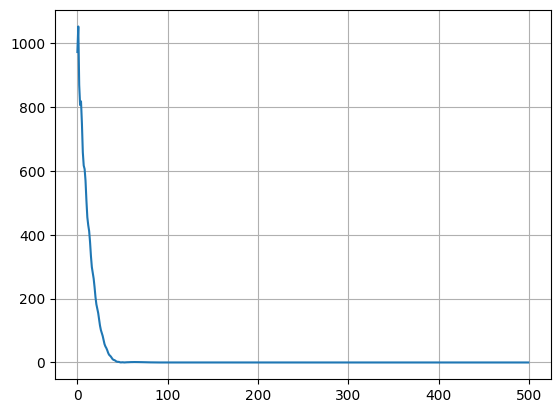

In [18]:
# x - градус цельсия, f - данные на выходе для обучения на готовых данных для сравнения с входными
#model -
x_celci = np.array([-40, -10, 0, 8, 15])
f_faring = np.array([-40, 14, 32, 46, 59])
"""это на выходе проверяется """

model = keras.Sequential() #sequential - функция кераса которая вызывает последовательную нейроную сеть
model.add(Dense(units=1, input_shape=(1, ), activation='linear'))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.9)) #тут достаточно точно дает на 0.9, дальше увеличивается только начальное количество ошибок

#ниже можно описывать алгоритм обучения
history = model.fit(x_celci, f_faring, epochs=500, verbose=0)

pred = np.arange(20)
print(pred)
print(model.predict(pred)) #это уже новые входные данные которые перошли через нейронку и вышли результатом

plt.plot(history.history['loss'])
plt.grid(True)
plt.show

код сбора пакетов в реальном времени для будущего обучения на реальных данных

In [ ]:
from scapy.all import *

def packet_callback(packet):
    # Функция обратного вызова, вызываемая при получении каждого пакета
    if IP in packet:
        # Если это IP-пакет
        ip_src = packet[IP].src
        ip_dst = packet[IP].dst
        proto = packet[IP].proto
        if TCP in packet:
            # Если это TCP-пакет
            sport = packet[TCP].sport
            dport = packet[TCP].dport
            flags = packet[TCP].flags
            print(f"0,tcp,{ip_src},{ip_dst},{sport},{dport},{flags}")
        elif UDP in packet:
            # Если это UDP-пакет
            sport = packet[UDP].sport
            dport = packet[UDP].dport
            print(f"0,udp,{ip_src},{ip_dst},{sport},{dport}")
        elif ICMP in packet:
            # Если это ICMP-пакет
            type = packet[ICMP].type
            code = packet[ICMP].code
            print(f"0,icmp,{ip_src},{ip_dst},{type},{code}")
        else:
            # Если это другой тип пакета
            print("0,other")

if __name__ == "__main__":
    # Запускаем сниффер, который будет прослушивать сетевой трафик
    sniff(prn=packet_callback, store=0)
